<a href="https://colab.research.google.com/github/Akshaythakur01/Applied_Statistic_practice/blob/master/Categorical_variables_correlation(Cramer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/Akshaythakur01/Applied_Statistic_practice/master/Dataset_Akshay/Churn_data.csv')

In [14]:
churn_df = churn_master_df.copy()

In [15]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [16]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [17]:
churn_df.corr( )

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


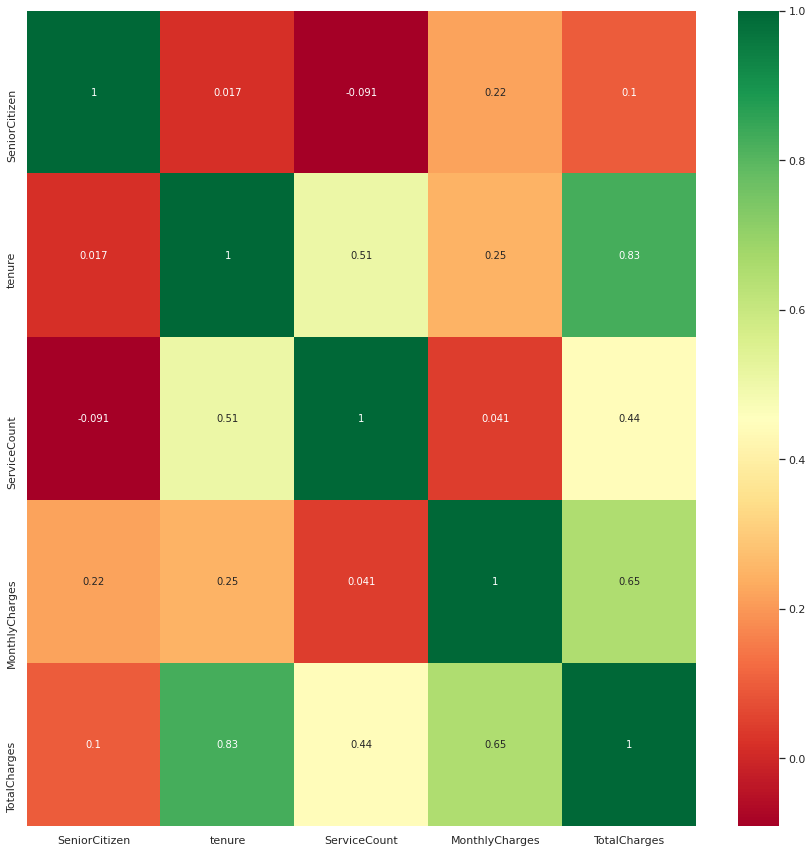

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=churn_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(churn_df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

Finding statistical significance of the relationship of the contract to churn

In [19]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

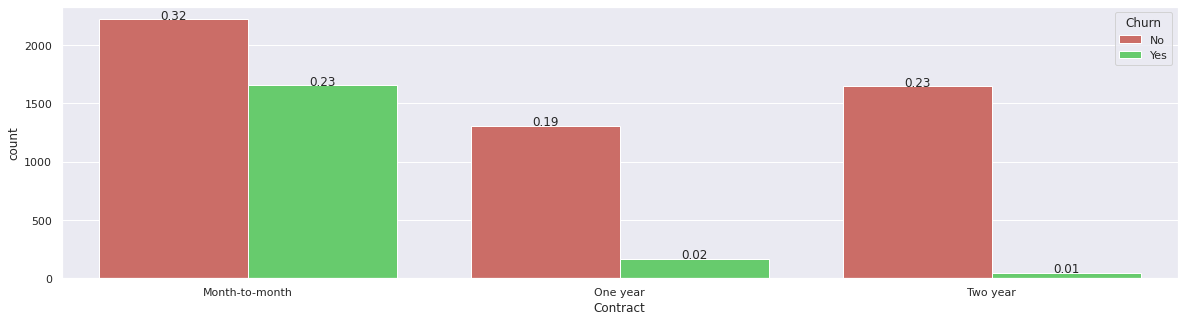

In [20]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
fig,ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x='Contract',hue='Churn',data=churn_df)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha='center')

In [23]:
Contract_churn_ct = pd.crosstab(index=churn_df['Contract'],columns=churn_df['Churn'])
Contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [25]:
from scipy import stats
(chi2,p,dof,_)=stats.chi2_contingency([Contract_churn_ct.iloc[0].values,Contract_churn_ct.iloc[1].values,Contract_churn_ct.iloc[2].values])

In [26]:
print('Chi-value : ',chi2)
print('P-value : ',p)
print('Degree of freedom : ',dof)

Chi-value :  1184.5965720837926
P-value :  5.863038300673391e-258
Degree of freedom :  2


Chi square is significant an p_value is almost zero

To check the strength of the relation ship we apply cramer v test

In [27]:
import numpy as np

In [28]:
np.sqrt(chi2/(churn_df.shape[0]))

0.4101156965761409

Near too one means more stronger the relationship, but we need comparitive judgement


In [29]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

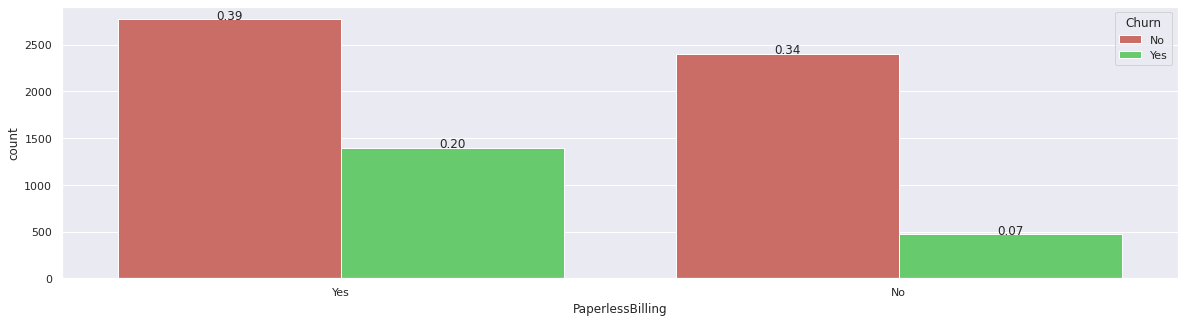

In [30]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
fig,ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x='PaperlessBilling',hue='Churn',data=churn_df)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha='center')

In [31]:
pb_churn_ct=pd.crosstab(index=churn_df['PaperlessBilling'],columns = churn_df['Churn'])

In [32]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [33]:
(chi2,p,dof,_)=stats.chi2_contingency([pb_churn_ct.iloc[0].values,pb_churn_ct.iloc[1].values])

In [34]:
print('Chi-value : ',chi2)
print('P-value : ',p)
print('Degree of freedom : ',dof)

Chi-value :  258.27764906707307
P-value :  4.073354668665985e-58
Degree of freedom :  1


p is almost close to zero but not as less as those of Contract Cramer test value

chi value is very less compared to Contract Cramer test value


In [35]:
np.sqrt(chi2/(churn_df.shape[0]))

0.19149814355338285

This is also less than Contract variable

In [36]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

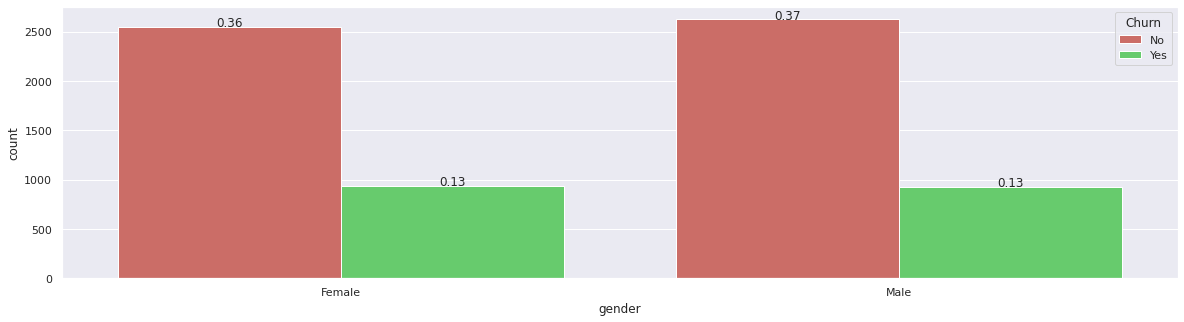

In [37]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
fig,ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x='gender',hue='Churn',data=churn_df)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha='center')

In [38]:
gender_churn_ct = pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])

In [39]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [40]:

(chi2,p,dof,_)=stats.chi2_contingency([gender_churn_ct.iloc[0].values,gender_churn_ct.iloc[1].values])

In [41]:
print('Chi-value : ',chi2)
print('P-value : ',p)
print('Degree of freedom : ',dof)

Chi-value :  0.4840828822091383
P-value :  0.48657873605618596
Degree of freedom :  1


In [42]:
np.sqrt(chi2/(churn_df.shape[0]))

0.008290505631771371

Hence we can say that Contract is having stronger relationship to the churn compared to Gender and Paper less billing